In [ ]:
import matplotlib.pyplot as plt
import json
import pandas as pd

In [40]:
def extract_losses(lines):
    train_losses = []
    val_losses = []
    for line in lines:
        # if line starts with '{', it's a JSON-like log entry, parse with json.loads
        if "{" in line:
            # first, remove everything before the first '{'
            line = line[line.index("{"):]
            log_entry = json.loads(line.replace("'", '"'))
            epoch_time = log_entry.get("epoch", None)
            if "loss" in log_entry.keys():
                train_losses.append((epoch_time, log_entry["loss"]))
            elif "eval_loss" in log_entry.keys():
                val_losses.append((epoch_time, log_entry["eval_loss"]))
    return train_losses, val_losses


In [41]:
# open log file
with open("logs/train_llama38b.log", "r", encoding="utf-8") as f:
    llama_lines = f.readlines()

# extract loss values
llama_train_losses, llama_val_losses = extract_losses(llama_lines)
print(llama_val_losses)

with open("logs/train_mistral7b.log", "r", encoding="utf-8") as f:
    mistral_lines = f.readlines()

# extract loss values
mistral_train_losses, mistral_val_losses = extract_losses(mistral_lines)
print(mistral_val_losses)

[(0.24, 0.20007635653018951), (0.49, 0.19713522493839264), (0.73, 0.19142550230026245), (0.98, 0.19015257060527802)]
[(0.24, 0.16764917969703674), (0.49, 0.16309621930122375), (0.73, 0.16062797605991364), (0.98, 0.15962868928909302)]


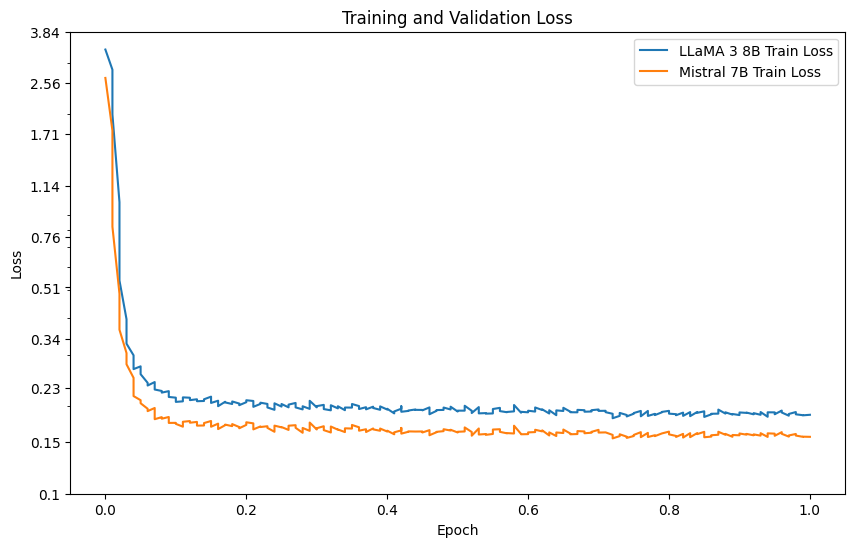

In [48]:
# plot losses
plt.figure(figsize=(10, 6))
plt.plot([x[0] for x in llama_train_losses], [x[1] for x in llama_train_losses], label="LLaMA 3 8B Train Loss")
#plt.plot([x[0] for x in llama_val_losses], [x[1] for x in llama_val_losses], label="LLaMA 3 8B Val Loss")
plt.plot([x[0] for x in mistral_train_losses], [x[1] for x in mistral_train_losses], label="Mistral 7B Train Loss")
#plt.plot([x[0] for x in mistral_val_losses], [x[1] for x in mistral_val_losses], label="Mistral 7B Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.ylim(0.1,3)
plt.yscale("log")
yticks = [round(0.1 * 1.5**i,2) for i in range(10)]
plt.yticks(yticks, yticks)
plt.show()

In [ ]:
with open('llama38b.preds','r') as f:
    llama_preds = f.readlines()

llama_df = pd.DataFrame([line.strip().split('\t') for line in llama_preds], columns=['input', 'target', 'pred'])